In [1]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
crime_data=pd.read_csv("/kaggle/input/crime-data/crime_data.csv")

In [3]:
crime_data.head(6)

,Disposition,OffenderStatus,Offender_Race,Offender_Gender,Offender_Age,PersonType,Victim_Race,Victim_Gender,Victim_Age,Victim_Fatal_Status,Report Type,Category
0,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
1,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
2,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
3,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
4,CLOSED,ARRESTED,BLACK,MALE,30.0,VICTIM,BLACK,FEMALE,29.0,Non-fatal,Supplemental Report,Theft
5,CLOSED,ARRESTED,NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,MALE,27.0,VICTIM,WHITE,FEMALE,62.0,Non-fatal,Incident Report,Miscellaneous


In [4]:
# Check for Missing Values
print(crime_data.isnull().sum())

Disposition            0
OffenderStatus         0
Offender_Race          0
Offender_Gender        0
Offender_Age           0
PersonType             0
Victim_Race            0
Victim_Gender          0
Victim_Age             0
Victim_Fatal_Status    0
Report Type            0
Category               0
dtype: int64


In [5]:
# Display Dataset Info
print(crime_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disposition          6638 non-null   object 
 1   OffenderStatus       6638 non-null   object 
 2   Offender_Race        6638 non-null   object 
 3   Offender_Gender      6638 non-null   object 
 4   Offender_Age         6638 non-null   float64
 5   PersonType           6638 non-null   object 
 6   Victim_Race          6638 non-null   object 
 7   Victim_Gender        6638 non-null   object 
 8   Victim_Age           6638 non-null   float64
 9   Victim_Fatal_Status  6638 non-null   object 
 10  Report Type          6638 non-null   object 
 11  Category             6638 non-null   object 
dtypes: float64(2), object(10)
memory usage: 622.4+ KB
None


In [6]:
# Display Summary Statistics
print(crime_data.describe())

       Offender_Age   Victim_Age
count   6638.000000  6638.000000
mean      34.634378    38.590539
std       12.797407    15.297202
min       11.000000     0.000000
25%       25.000000    27.000000
50%       33.000000    36.000000
75%       42.000000    48.000000
max       83.000000   124.000000


In [7]:
print("\nSummary Statistics (Categorical Columns):")
print(crime_data.describe(include=['object']))


Summary Statistics (Categorical Columns):
       Disposition OffenderStatus Offender_Race Offender_Gender PersonType  \
count         6638           6638          6638            6638       6638   
unique           2              1             6               2          3   
top         CLOSED       ARRESTED         BLACK            MALE     VICTIM   
freq          6256           6638          5453            4987       6632   

       Victim_Race Victim_Gender Victim_Fatal_Status      Report Type  \
count         6638          6638                6638             6638   
unique           6             3                   2                2   
top          BLACK        FEMALE           Non-fatal  Incident Report   
freq          4394          3991                6614             3459   

        Category  
count       6638  
unique         6  
top     Violence  
freq        3489  


In [8]:
# Perform Demographic Analysis

# Gender Distribution
print("\nGender Distribution (Offenders):")
print(crime_data['Offender_Gender'].value_counts())

print("\nGender Distribution (Victims):")
print(crime_data['Victim_Gender'].value_counts())


Gender Distribution (Offenders):
Offender_Gender
MALE      4987
FEMALE    1651
Name: count, dtype: int64

Gender Distribution (Victims):
Victim_Gender
FEMALE     3991
MALE       2639
UNKNOWN       8
Name: count, dtype: int64


Text(0, 0.5, 'Count')

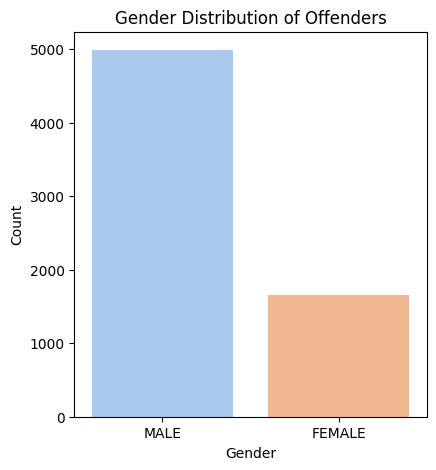

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=crime_data, x='Offender_Gender', palette="pastel")
plt.title("Gender Distribution of Offenders")
plt.xlabel("Gender")
plt.ylabel("Count")

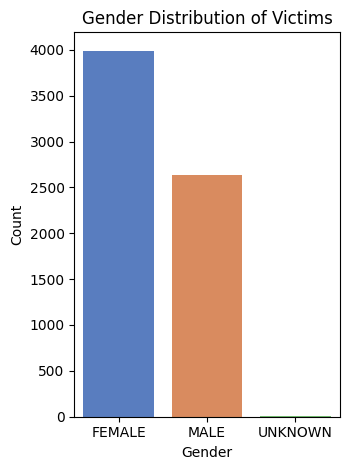

In [10]:
plt.subplot(1, 2, 2)
sns.countplot(data=crime_data, x='Victim_Gender', palette="muted")
plt.title("Gender Distribution of Victims")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
# Race Distribution
print("\nRace Distribution (Offenders):")
print(crime_data['Offender_Race'].value_counts())

print("\nRace Distribution (Victims):")
print(crime_data['Victim_Race'].value_counts())


Race Distribution (Offenders):
Offender_Race
BLACK                                        5453
WHITE                                        1056
UNKNOWN                                       101
ASIAN                                          18
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER       6
AMER. IND.                                      4
Name: count, dtype: int64

Race Distribution (Victims):
Victim_Race
BLACK                                        4394
WHITE                                        1986
UNKNOWN                                       198
ASIAN                                          52
AMER. IND.                                      5
NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER       3
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BLACK'),
  Text(1, 0, 'WHITE'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'ASIAN'),
  Text(4, 0, 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'),
  Text(5, 0, 'AMER. IND.')])

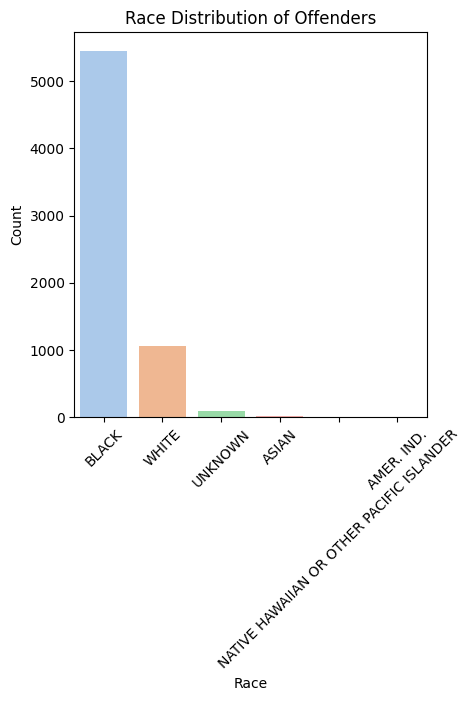

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=crime_data, x='Offender_Race', palette="pastel", order=crime_data['Offender_Race'].value_counts().index)
plt.title("Race Distribution of Offenders")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)

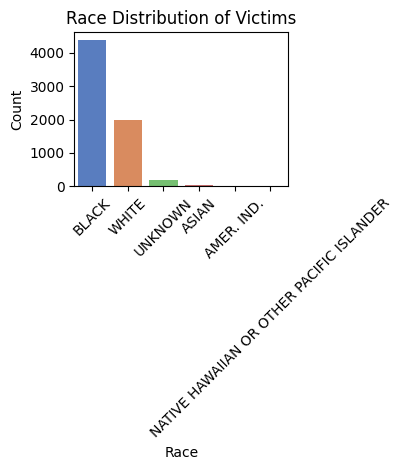

In [13]:
plt.subplot(1, 2, 2)
sns.countplot(data=crime_data, x='Victim_Race', palette="muted", order=crime_data['Victim_Race'].value_counts().index)
plt.title("Race Distribution of Victims")
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
# Crime Categories by Offender Gender
print("\nCrime Categories by Offender Gender:")
print(crime_data.groupby(['Offender_Gender', 'Category']).size())


Crime Categories by Offender Gender:
Offender_Gender  Category              
FEMALE           Miscellaneous              368
                 Sexual Crimes                1
                 Theft                      271
                 Vandalism                  139
                 Violence                   872
MALE             Drug and Weapon Crimes      13
                 Miscellaneous              860
                 Theft                     1248
                 Vandalism                  249
                 Violence                  2617
dtype: int64


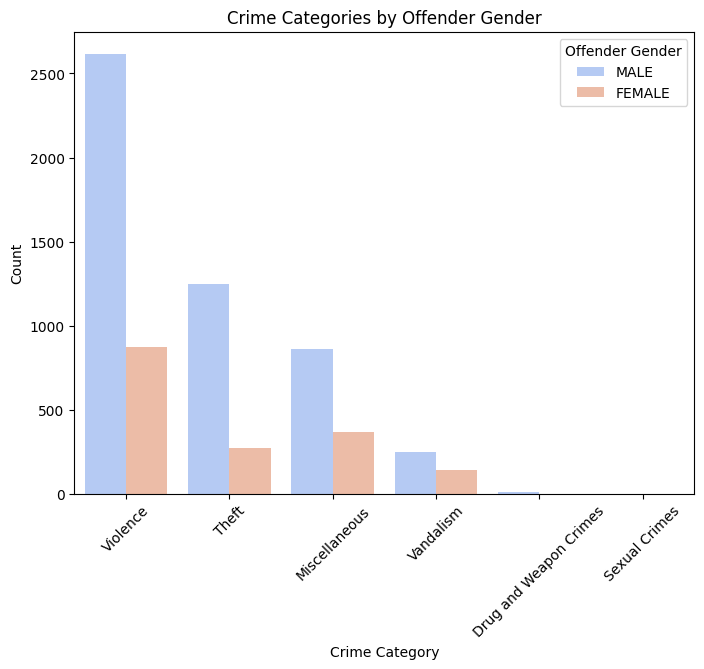

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(data=crime_data, x='Category', hue='Offender_Gender', palette="coolwarm", order=crime_data['Category'].value_counts().index)
plt.title("Crime Categories by Offender Gender")
plt.xlabel("Crime Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Offender Gender")
plt.show()

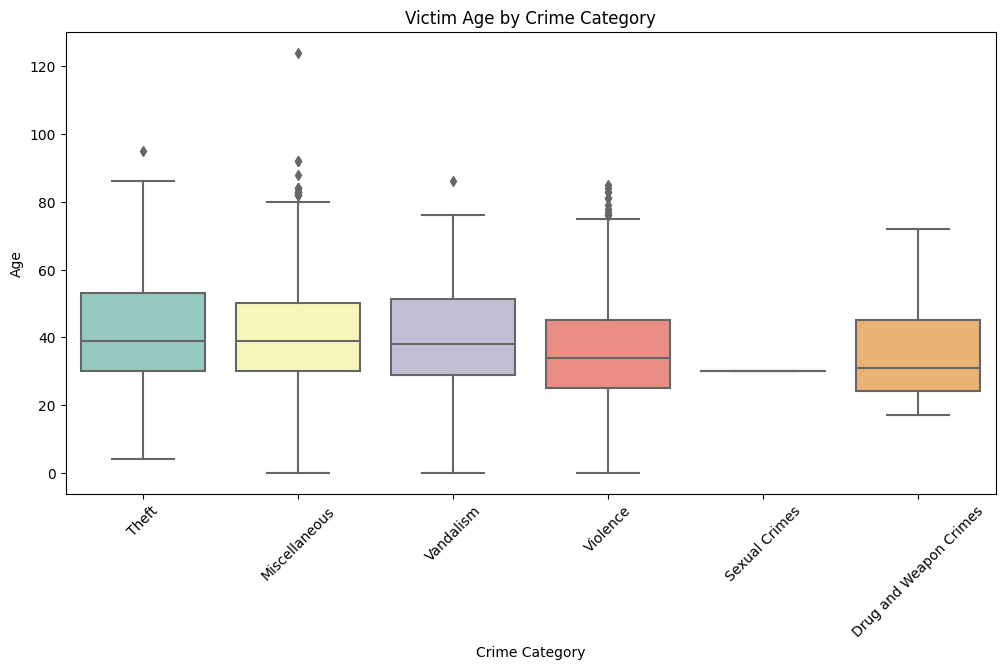

In [16]:
# Victim Age vs. Offender Age by Crime Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_data, x='Category', y='Victim_Age', palette="Set3")
plt.title("Victim Age by Crime Category")
plt.xlabel("Crime Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

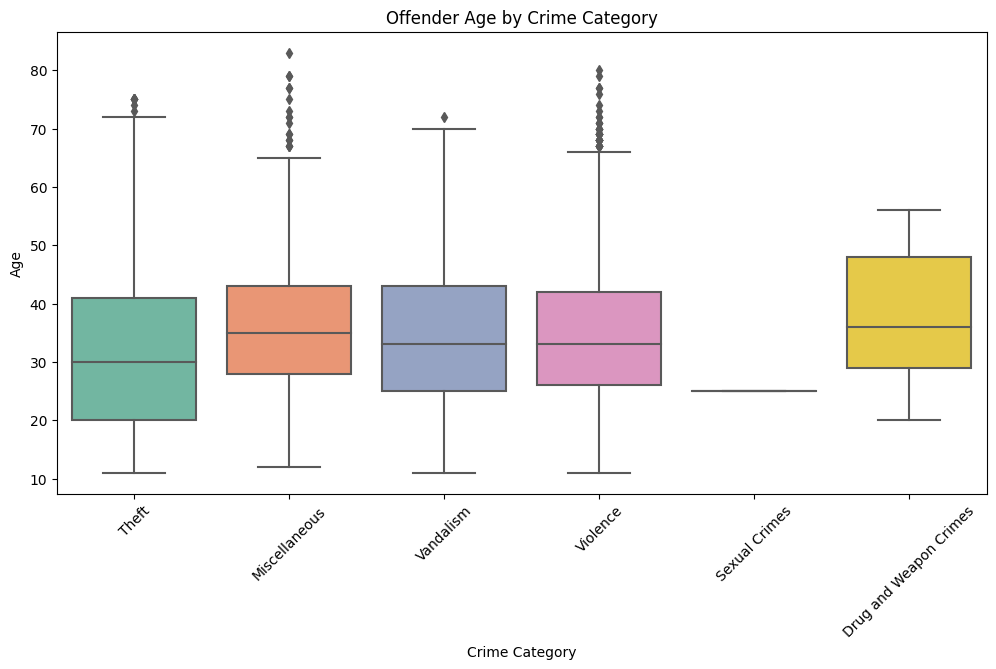

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_data, x='Category', y='Offender_Age', palette="Set2")
plt.title("Offender Age by Crime Category")
plt.xlabel("Crime Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

In [18]:
# Clean and Preprocess Data for Predictive Modeling
# Handling Outliers
print("\nChecking for age outliers...")
print("Offender Age > 100:", crime_data[crime_data['Offender_Age'] > 100].shape[0])
print("Victim Age > 100:", crime_data[crime_data['Victim_Age'] > 100].shape[0])


Checking for age outliers...
Offender Age > 100: 0
Victim Age > 100: 1


In [19]:
# Remove outliers in ages
crime_data = crime_data[(crime_data['Offender_Age'] <= 100) & (crime_data['Victim_Age'] <= 100)]


In [20]:
# Encoding Categorical Variables
print("\nEncoding categorical variables...")
encoded_data = pd.get_dummies(crime_data, columns=['Offender_Race', 'Offender_Gender', 'Victim_Race', 'Victim_Gender', 'Category'], drop_first=True)



Encoding categorical variables...


In [21]:
print("\nEncoded Data Sample:")
print(encoded_data.head())


Encoded Data Sample:
  Disposition OffenderStatus  Offender_Age PersonType  Victim_Age  \
0      CLOSED       ARRESTED          30.0     VICTIM        29.0   
1      CLOSED       ARRESTED          30.0     VICTIM        29.0   
2      CLOSED       ARRESTED          30.0     VICTIM        29.0   
3      CLOSED       ARRESTED          30.0     VICTIM        29.0   
4      CLOSED       ARRESTED          30.0     VICTIM        29.0   

  Victim_Fatal_Status          Report Type  Offender_Race_ASIAN  \
0           Non-fatal  Supplemental Report                False   
1           Non-fatal  Supplemental Report                False   
2           Non-fatal  Supplemental Report                False   
3           Non-fatal  Supplemental Report                False   
4           Non-fatal  Supplemental Report                False   

   Offender_Race_BLACK  \
0                 True   
1                 True   
2                 True   
3                 True   
4                 True   

   

In [22]:
# Feature and Target Preparation
X = encoded_data.drop(columns=['Disposition'])
y = (encoded_data['Disposition'] == 'CLOSED').astype(int)  # Binary target: 1 for CLOSED, 0 for other
print("\nFeature matrix (X) and target vector (y) prepared.")
print("X Shape:", X.shape)
print("y Shape:", y.shape)


Feature matrix (X) and target vector (y) prepared.
X Shape: (6637, 24)
y Shape: (6637,)


In [23]:
# Explore Hypothesis Testing or Statistical Methods
# Chi-Square Test for Gender and Crime Categories
print("\nChi-Square Test: Gender vs. Crime Categories")
gender_crime_table = pd.crosstab(crime_data['Offender_Gender'], crime_data['Category'])
chi2, p, _, _ = chi2_contingency(gender_crime_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)


Chi-Square Test: Gender vs. Crime Categories
Chi-Square Statistic: 89.65481945284661
p-value: 7.94021166635668e-18


In [24]:
# T-Test for Age and Disposition
print("\nT-Test: Victim Age for Closed vs. Open Cases")
closed_cases = crime_data[crime_data['Disposition'] == 'CLOSED']['Victim_Age']
open_cases = crime_data[crime_data['Disposition'] != 'CLOSED']['Victim_Age']
t_stat, p_val = ttest_ind(closed_cases, open_cases, equal_var=False)
print("T-Statistic:", t_stat)
print("p-value:", p_val)


T-Test: Victim Age for Closed vs. Open Cases
T-Statistic: 0.06251920690954677
p-value: 0.9501783058468439


In [25]:
# Feature Engineering
# Creating age brackets
bins = [0, 18, 35, 60, 100]
labels = ['Child', 'Young Adult', 'Adult', 'Senior']
crime_data['Offender_Age_Group'] = pd.cut(crime_data['Offender_Age'], bins=bins, labels=labels)
crime_data['Victim_Age_Group'] = pd.cut(crime_data['Victim_Age'], bins=bins, labels=labels)

# Adding age gap column
crime_data['Age_Gap'] = abs(crime_data['Offender_Age'] - crime_data['Victim_Age'])
print("Added age groups and age gap column.")

Added age groups and age gap column.


In [26]:
#  Clustering Analysis
# Selecting features for clustering
features = ['Offender_Age', 'Victim_Age', 'Age_Gap']
scaled_features = StandardScaler().fit_transform(crime_data[features])

In [27]:
# Selecting features for clustering
features = ['Offender_Age', 'Victim_Age', 'Age_Gap']
scaled_features = StandardScaler().fit_transform(crime_data[features])


In [28]:
# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
crime_data['Cluster'] = kmeans.fit_predict(scaled_features)

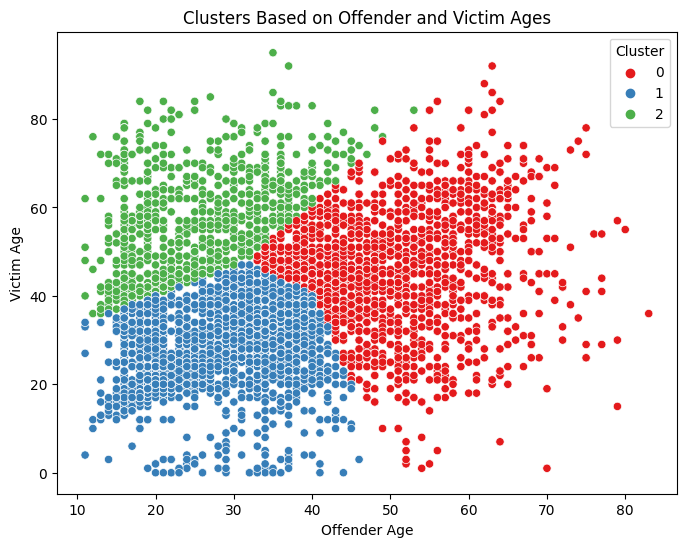

In [29]:
# Visualizing clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=crime_data['Offender_Age'], y=crime_data['Victim_Age'], hue=crime_data['Cluster'], palette="Set1")
plt.title("Clusters Based on Offender and Victim Ages")
plt.xlabel("Offender Age")
plt.ylabel("Victim Age")
plt.show()